In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Import necessary packages
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve
import re #this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk #this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string #this is used for string manipulations
import matplotlib
import warnings
import re
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
from PIL import Image
%matplotlib inline

warnings.filterwarnings("ignore")

## Problem 1:
## You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.


### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. 

In [2]:
voters= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

In [3]:
voters.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
voters.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [5]:
voters=voters.drop('Unnamed: 0',axis=1)

In [6]:
voters.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [7]:
voters.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [8]:
voters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [9]:
voters.shape

(1525, 9)

In [10]:
dups=voters.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
voters[dups]

Total no of duplicate values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [11]:
voters=voters.drop_duplicates()

In [12]:
dups=voters.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
voters[dups]

Total no of duplicate values = 0


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [13]:
for feature in voters.columns:
    if voters[feature].dtype=='object':
           print(feature.upper() ," ",voters[feature].nunique())
           print(voters[feature].value_counts().sort_values())
            

VOTE   2
Conservative     460
Labour          1057
Name: vote, dtype: int64
GENDER   2
male      709
female    808
Name: gender, dtype: int64


###  1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

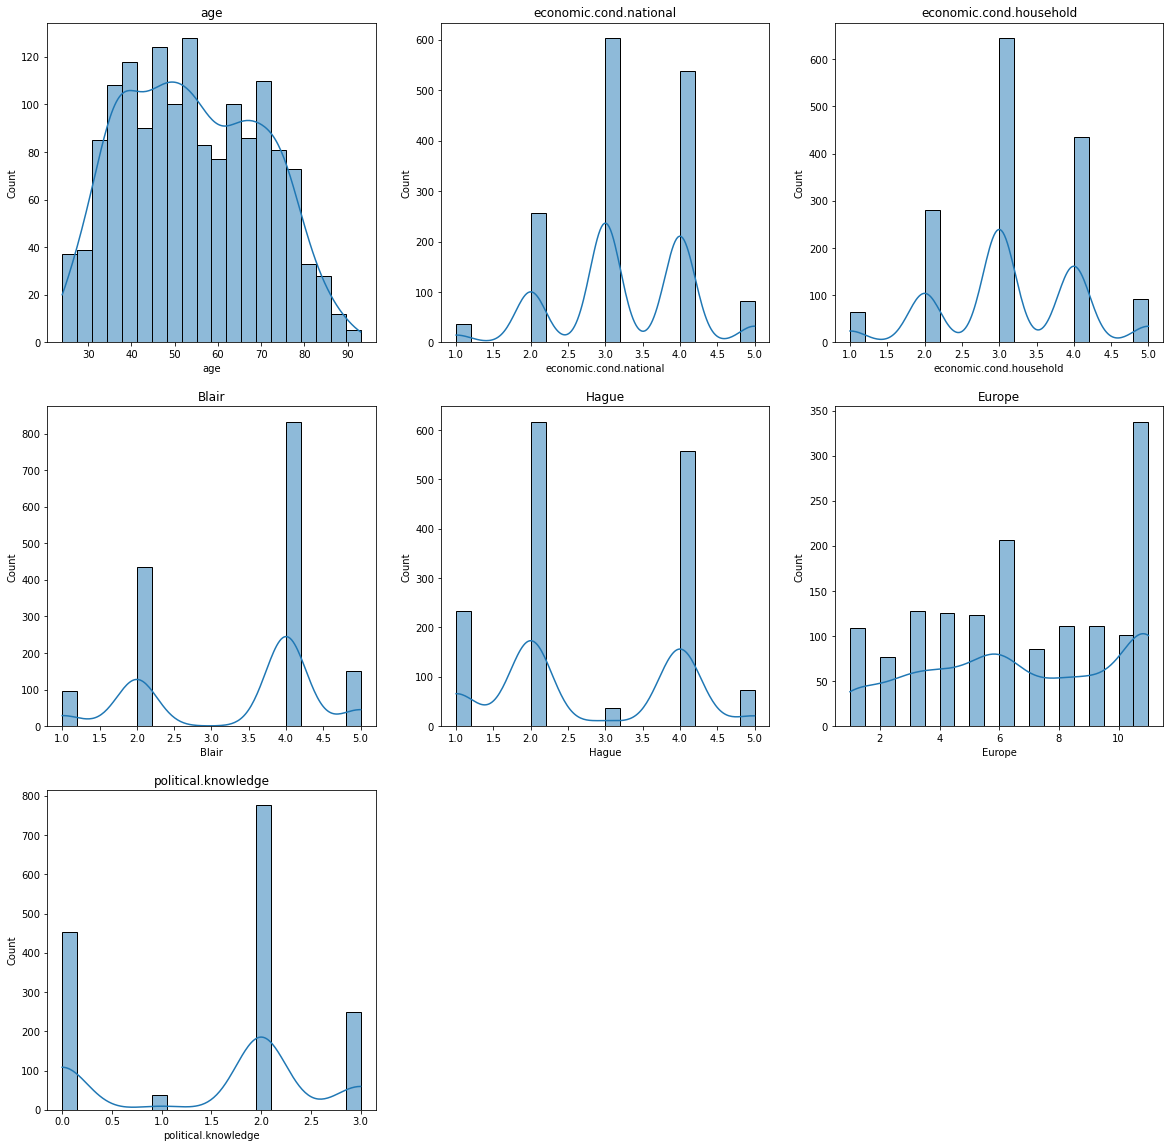

In [14]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1);
plt.title('age')
sns.histplot(voters['age'],bins=20,kde=True);

plt.subplot(3,3,2)
plt.title('economic.cond.national')
sns.histplot(voters['economic.cond.national'],bins=20,kde=True);

plt.subplot(3,3,3)
plt.title('economic.cond.household')
sns.histplot(voters['economic.cond.household'],bins=20,kde=True);

plt.subplot(3,3,4)
plt.title('Blair')
sns.histplot(voters['Blair'],bins=20,kde=True);

plt.subplot(3,3,5)
plt.title('Hague')
sns.histplot(voters['Hague'],bins=20,kde=True);

plt.subplot(3,3,6)
plt.title('Europe')
sns.histplot(voters['Europe'],bins=20,kde=True);

plt.subplot(3,3,7)
plt.title('political.knowledge')
sns.histplot(voters['political.knowledge'],bins=20,kde=True);

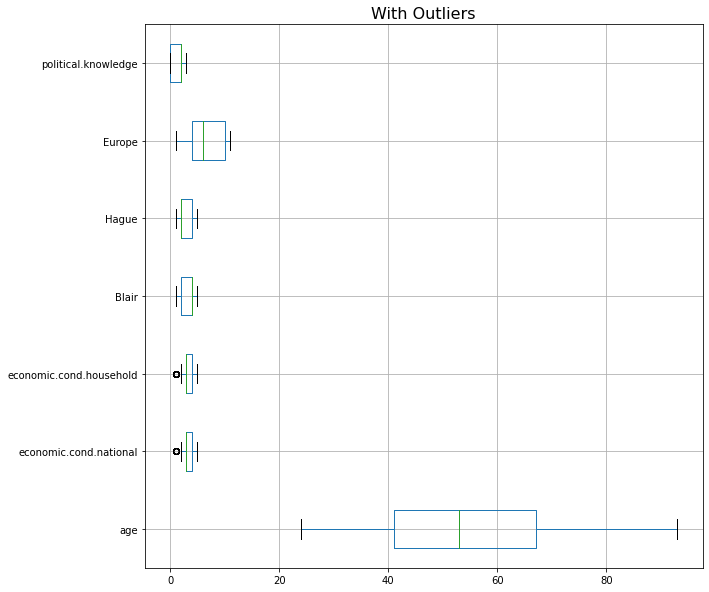

In [15]:
# construct box plot for continuous variables
cont=voters.dtypes[(voters.dtypes!='uint8') & (voters.dtypes!='bool')].index
plt.figure(figsize=(10,10))
voters[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [17]:
for column in voters[['economic.cond.national','economic.cond.household']].columns:
    lr,ur=remove_outlier(voters[column])
    voters[column]=np.where(voters[column]>ur,ur,voters[column])
    voters[column]=np.where(voters[column]<lr,lr,voters[column])

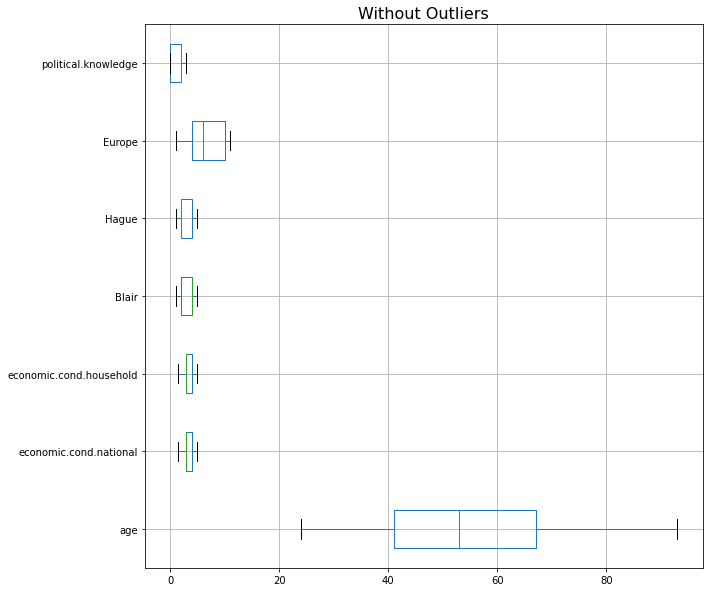

In [18]:
# construct box plot for continuous variables
cont=voters.dtypes[(voters.dtypes!='uint8') & (voters.dtypes!='bool')].index
plt.figure(figsize=(10,10))
voters[cont].boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show()

In [19]:
voters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1517 non-null   object 
 1   age                      1517 non-null   int64  
 2   economic.cond.national   1517 non-null   float64
 3   economic.cond.household  1517 non-null   float64
 4   Blair                    1517 non-null   int64  
 5   Hague                    1517 non-null   int64  
 6   Europe                   1517 non-null   int64  
 7   political.knowledge      1517 non-null   int64  
 8   gender                   1517 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 118.5+ KB


<Figure size 1080x1080 with 0 Axes>

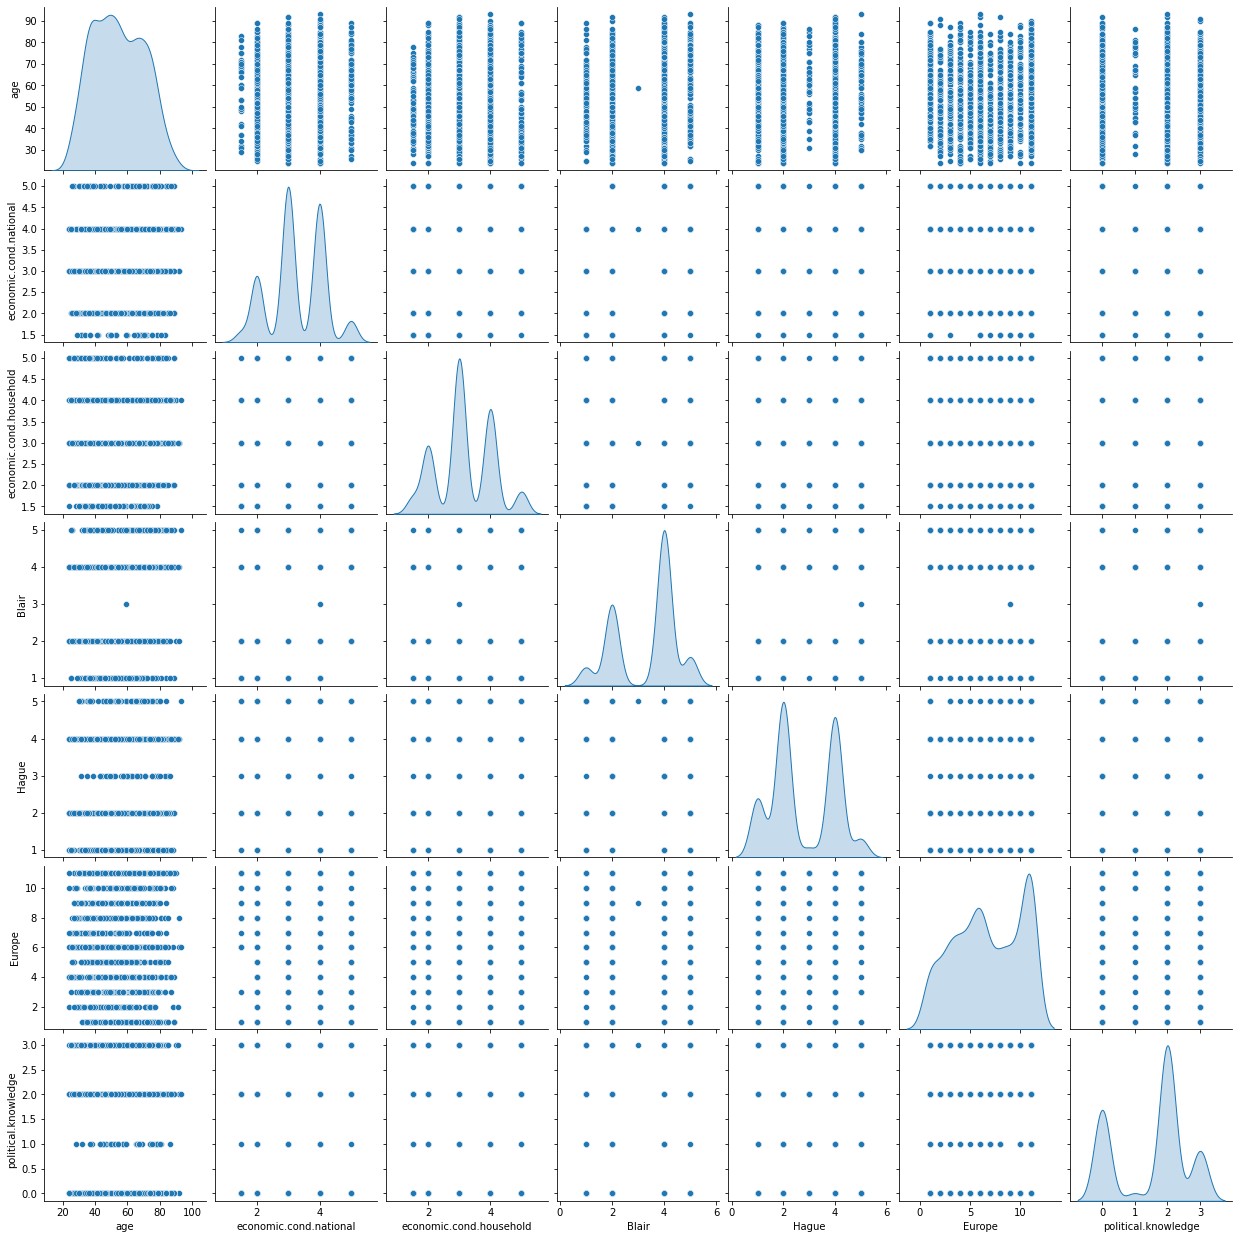

In [20]:
plt.figure(figsize=(15,15))
sns.pairplot(voters, diag_kind = 'kde', corner=False);

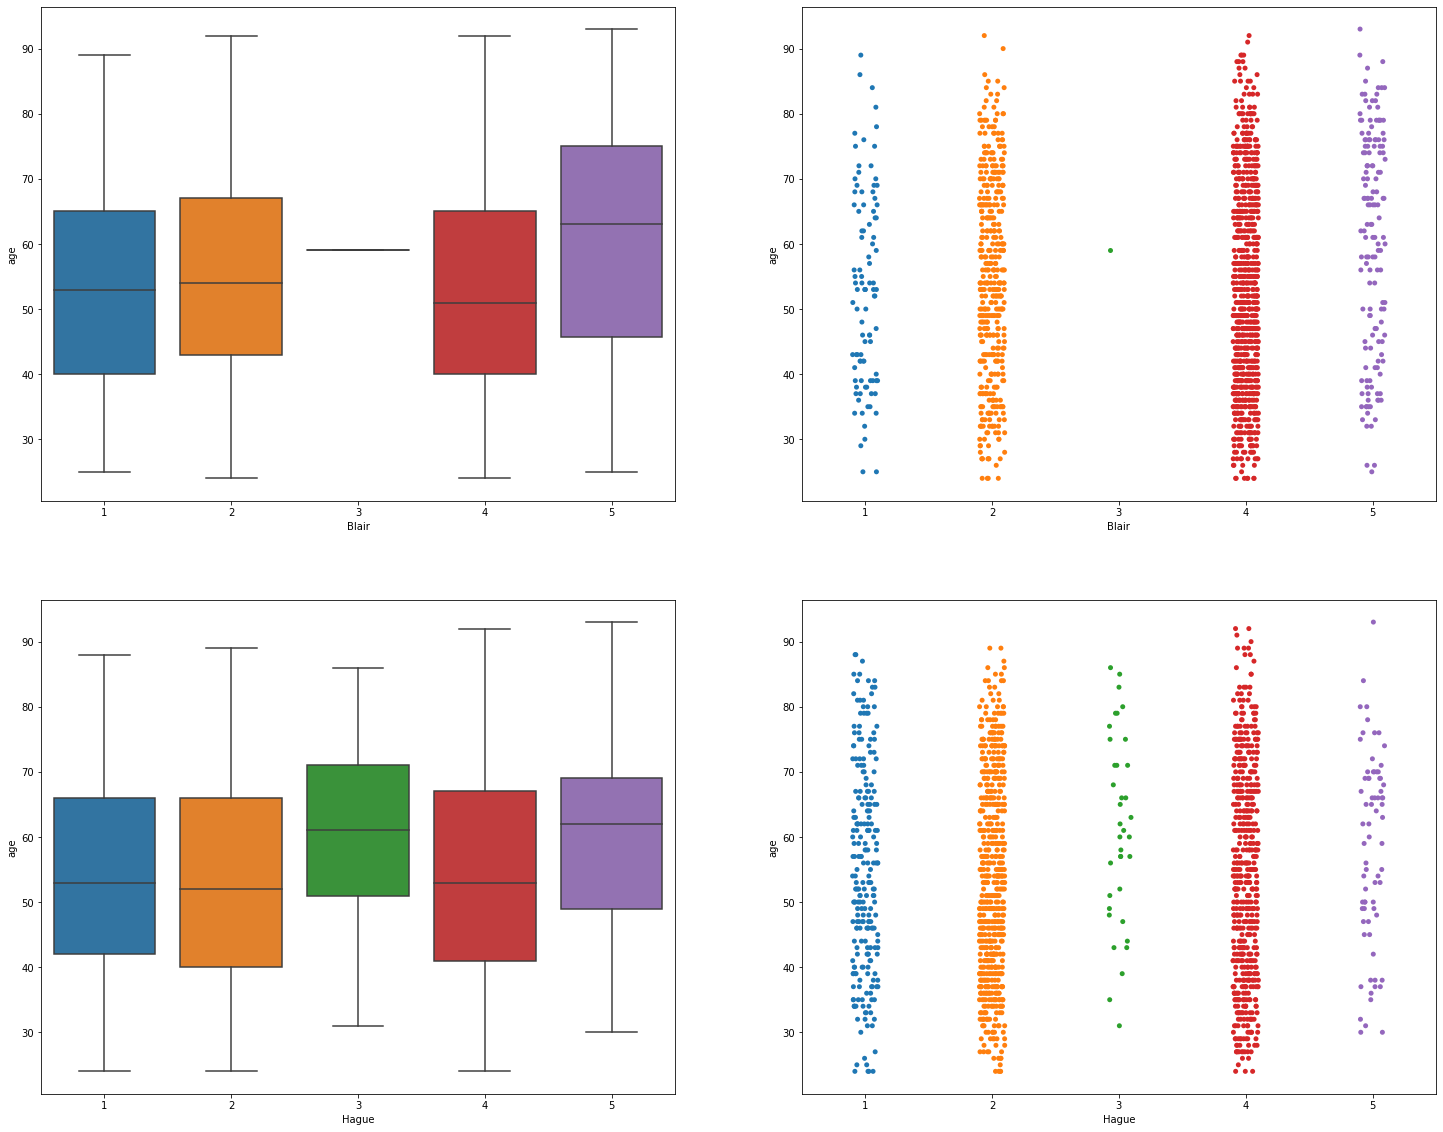

In [21]:
fig, axes = plt.subplots(nrows=2,ncols=2);
fig.set_size_inches(25,20);
sns.boxplot(voters["Blair"],voters["age"], ax = axes[0][0]);
sns.stripplot(voters["Blair"],voters["age"], ax = axes[0][1]);
sns.boxplot(voters["Hague"],voters["age"], ax = axes[1][0]);
sns.stripplot(voters["Hague"],voters["age"], ax = axes[1][1]);

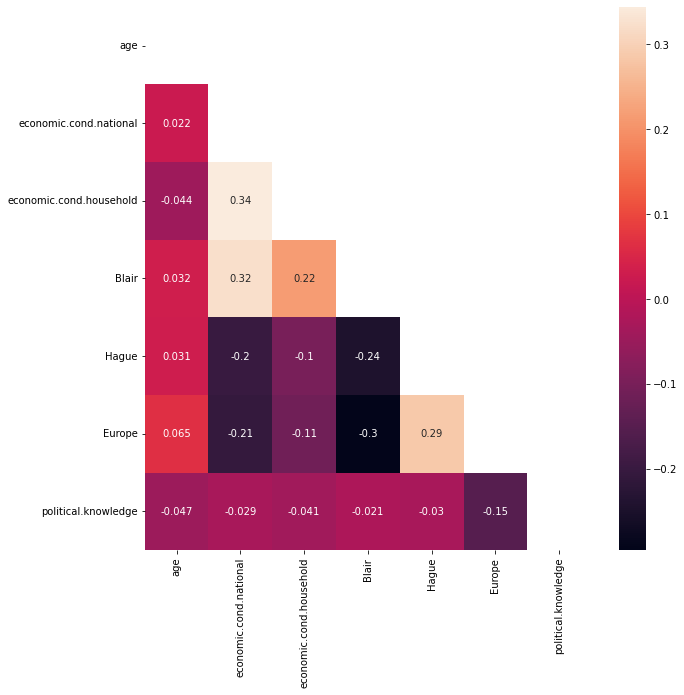

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(voters.corr(),annot=True,mask =np.triu(np.ones_like(voters.corr(), dtype=bool)));

### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

In [23]:
data_en= pd.get_dummies(voters, columns=['vote','gender'],drop_first=True)

In [24]:
data_en.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3.0,3.0,4,1,2,2,1,0
1,36,4.0,4.0,4,4,5,2,1,1
2,35,4.0,4.0,5,2,3,2,1,1
3,24,4.0,2.0,2,1,4,0,1,0
4,41,2.0,2.0,1,1,6,2,1,1


In [25]:
data_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1517 non-null   int64  
 1   economic.cond.national   1517 non-null   float64
 2   economic.cond.household  1517 non-null   float64
 3   Blair                    1517 non-null   int64  
 4   Hague                    1517 non-null   int64  
 5   Europe                   1517 non-null   int64  
 6   political.knowledge      1517 non-null   int64  
 7   vote_Labour              1517 non-null   uint8  
 8   gender_male              1517 non-null   uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 130.1 KB


### Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
X = StandardScaler()

In [28]:
voters[['age']]= X.fit_transform(voters[['age']])
voters

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,-0.716161,3.0,3.0,4,1,2,2,female
1,Labour,-1.162118,4.0,4.0,4,4,5,2,male
2,Labour,-1.225827,4.0,4.0,5,2,3,2,male
3,Labour,-1.926617,4.0,2.0,2,1,4,0,female
4,Labour,-0.843577,2.0,2.0,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,0.812836,5.0,3.0,2,4,11,3,male
1521,Conservative,1.195085,2.0,2.0,4,4,8,2,male
1522,Labour,-1.098410,3.0,3.0,5,4,2,2,male
1523,Conservative,0.430587,3.0,3.0,1,4,11,2,male


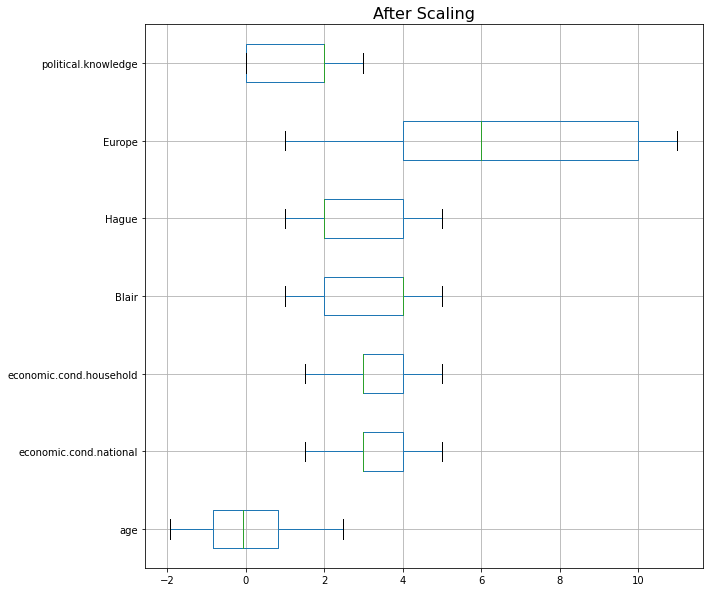

In [29]:
# construct box plot for continuous variables
cont=voters.dtypes[(voters.dtypes!='uint8') & (voters.dtypes!='bool')].index
plt.figure(figsize=(10,10))
voters[cont].boxplot(vert=0)
plt.title('After Scaling',fontsize=16)
plt.show()

In [30]:
voters.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,-0.716161,3.0,3.0,4,1,2,2,female
1,Labour,-1.162118,4.0,4.0,4,4,5,2,male
2,Labour,-1.225827,4.0,4.0,5,2,3,2,male
3,Labour,-1.926617,4.0,2.0,2,1,4,0,female
4,Labour,-0.843577,2.0,2.0,1,1,6,2,male


In [31]:
data_en.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,54.241266,3.257416,3.159196,3.335531,2.749506,6.740277,1.540541,0.696770,0.467370
std,15.701741,0.853647,0.886279,1.174772,1.232479,3.299043,1.084417,0.459805,0.499099
min,24.000000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,0.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,1.000000,0.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,1.000000,1.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000,1.000000,1.000000


In [32]:
data_en=data_en.rename(columns={'vote_Labour':'IsLabour_or_not' ,'gender_male':'IsMale_or_not'},inplace= False)

In [33]:
data_NB = data_en.copy()
data_knn = data_en.copy()
data_lr = data_en.copy()
data_lda = data_en.copy()
data_gbo = data_en.copy()
data_ba = data_en.copy()
data_bo = data_en.copy()

### Logistic Regression

In [34]:
X = data_lr.drop('IsLabour_or_not', axis=1)

# Copy target into the y dataframe.
y = data_lr[['IsLabour_or_not']]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
Logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)

In [38]:
Logistic_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Train Data

Accuracy 0.8341187558906692
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

----------------Train Data--------------


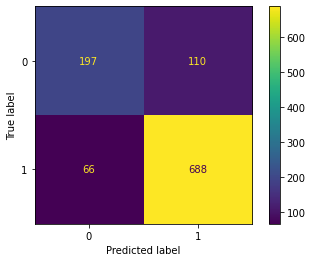

In [39]:
Y_train_predict=Logistic_model.predict(X_train)
model_score=Logistic_model.score(X_train, y_train)

print("Accuracy",model_score)
print(metrics.classification_report(y_train,Y_train_predict))
print("----------------Train Data--------------")
plot_confusion_matrix(Logistic_model,X_train,y_train);

In [40]:
probs_train=Logistic_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the AUC of Train Data %.3f " % auc)

the AUC of Train Data 0.890 


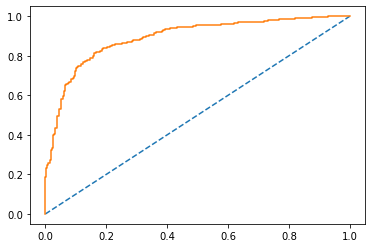

In [41]:
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

### Test Data

Accuracy 0.8289473684210527
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456

----------------Test Data--------------


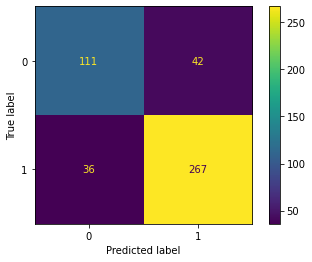

In [42]:
Y_test_predict=Logistic_model.predict(X_test)
model_score=Logistic_model.score(X_test, y_test)
print("Accuracy",model_score)
print(metrics.classification_report(y_test,Y_test_predict))
print("----------------Test Data--------------")
plot_confusion_matrix(Logistic_model,X_test,y_test);

In [43]:
probs_test=Logistic_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("The AUC of Test Data is %.3f " % auc)

The AUC of Test Data is 0.883 


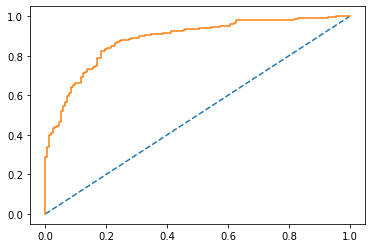

In [44]:
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr);

### Linear Discriminant Analysis

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [46]:
X = data_lda.drop('IsLabour_or_not', axis=1)
# Copy target into the y dataframe.
y = data_lda[['IsLabour_or_not']]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [48]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

Accuracy 0.8341187558906692
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

----------------Train Data--------------


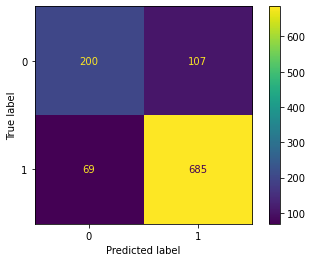

In [49]:
Y_train_predict=LDA_model.predict(X_train)
model_score=LDA_model.score(X_train, y_train)
print("Accuracy",model_score)
print(metrics.classification_report(y_train,Y_train_predict))
print("----------------Train Data--------------")
plot_confusion_matrix(LDA_model,X_train,y_train);

The AUC of Train Data 0.890 


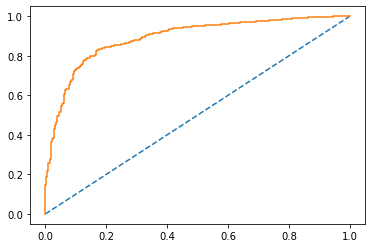

In [50]:
probs_train=LDA_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("The AUC of Train Data %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

Accuracy 0.831140350877193
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456

----------------Test Data--------------


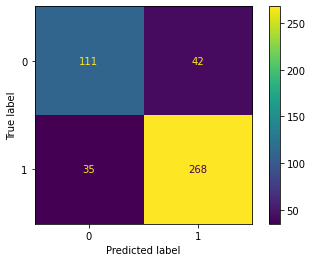

In [51]:
Y_test_predict=LDA_model.predict(X_test)
model_score=LDA_model.score(X_test, y_test)

print("Accuracy",model_score)
print(metrics.classification_report(y_test,Y_test_predict))
print("----------------Test Data--------------")
plot_confusion_matrix(LDA_model,X_test,y_test);

In [52]:
probs_test=LDA_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("The AUC of Test Data is %.3f " % auc)

The AUC of Test Data is 0.888 


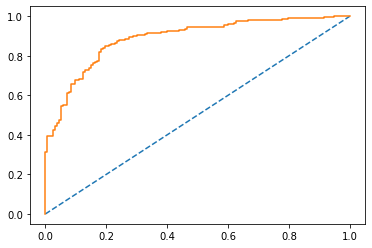

In [53]:
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr);

### Naives Bayes

In [54]:
X = data_NB.drop('IsLabour_or_not', axis=1)
# Copy target into the y dataframe.
y = data_NB[['IsLabour_or_not']]

In [55]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,43,3.0,3.0,4,1,2,2,0
1,36,4.0,4.0,4,4,5,2,1
2,35,4.0,4.0,5,2,3,2,1
3,24,4.0,2.0,2,1,4,0,0
4,41,2.0,2.0,1,1,6,2,1


In [56]:
y.head()

,IsLabour_or_not
0,1
1,1
2,1
3,1
4,1


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [59]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (1061, 8)
X_test (456, 8)
y_train (1061, 1)
y_test (456, 1)


In [60]:
NB_model=GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

#### Train data

Accuracy 0.8341187558906692
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061

----------------Train Data--------------


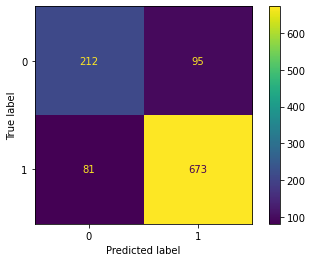

In [61]:
Y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, y_train)
print("Accuracy",model_score)
print(metrics.classification_report(y_train,Y_train_predict))
print("----------------Train Data--------------")
plot_confusion_matrix(NB_model,X_train,y_train);

The AUC of Train Data 0.889 


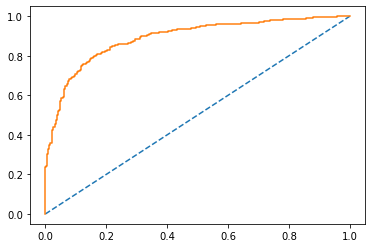

In [62]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("The AUC of Train Data %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

#### Test data

Accuracy 0.8223684210526315
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456

----------------Test Data--------------


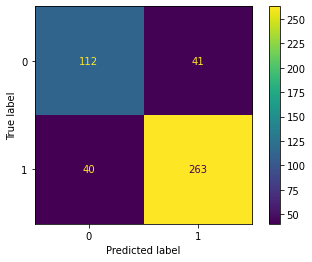

In [63]:
Y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, y_test)

print("Accuracy",model_score)
print(metrics.classification_report(y_test,Y_test_predict))
print("----------------Test Data--------------")
plot_confusion_matrix(NB_model,X_test,y_test);

The AUC of Test Data is 0.876 


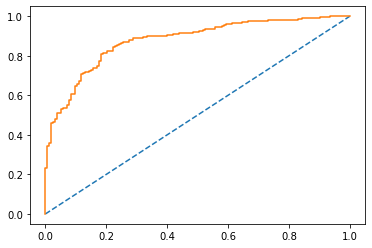

In [64]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("The AUC of Test Data is %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr);

### KNN

In [65]:
X = data_knn.drop('IsLabour_or_not', axis=1)
# Copy target into the y dataframe.
y = data_knn[['IsLabour_or_not']]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [68]:
ac_score=[]

for k in range(1,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores=knn.score(X_test,y_test)
    ac_score.append(scores)
    
MCE=[1-x for x in ac_score]
MCE

[0.2171052631578947,
 0.20833333333333337,
 0.17763157894736847,
 0.17763157894736847,
 0.19298245614035092,
 0.19517543859649122,
 0.1907894736842105,
 0.19298245614035092,
 0.19956140350877194,
 0.19736842105263153]

#### Train Data

Accuracy 0.8576814326107446
              precision    recall  f1-score   support

           0       0.80      0.68      0.74       307
           1       0.88      0.93      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061

----------------Train Data--------------


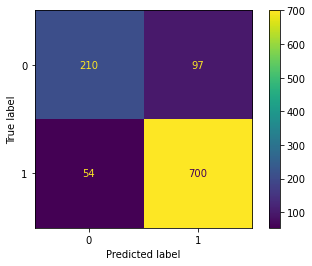

In [69]:
Y_train_predict=KNN_model.predict(X_train)
model_score=KNN_model.score(X_train, y_train)

print("Accuracy",model_score)
print(metrics.classification_report(y_train,Y_train_predict))
print("----------------Train Data--------------")
plot_confusion_matrix(KNN_model,X_train,y_train);

The AUC of Train Data 0.926 


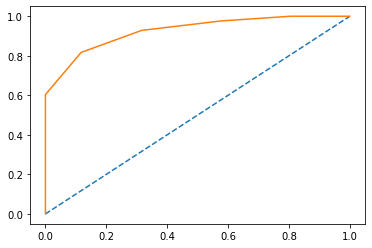

In [70]:
probs_train=KNN_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("The AUC of Train Data %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

#### Test Data

Accuracy 0.8223684210526315
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456

----------------Test Data--------------


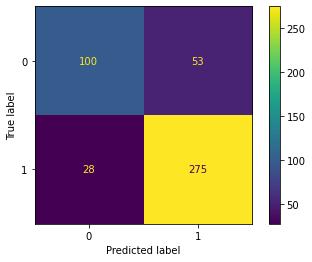

In [71]:
Y_test_predict=KNN_model.predict(X_test)
model_score=KNN_model.score(X_test, y_test)
print("Accuracy",model_score)
print(metrics.classification_report(y_test,Y_test_predict))
print("----------------Test Data--------------")
plot_confusion_matrix(KNN_model,X_test,y_test);

The AUC of Test Data is 0.861 


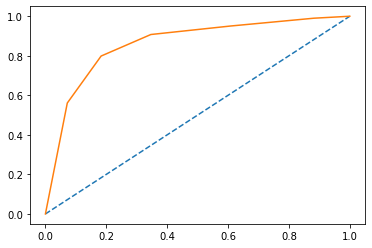

In [72]:
probs_test=KNN_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("The AUC of Test Data is %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr);

### Model Tuning

#### Applying Grid Search on all models

In [73]:
# Initialze the estimators
clf1 = RandomForestClassifier(random_state=1)
clf2 = LogisticRegression(random_state=1)
clf3 = DecisionTreeClassifier(random_state=1)
clf4 = KNeighborsClassifier()
clf5 = MultinomialNB()
clf6 = GradientBoostingClassifier(random_state=1)

In [74]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**2, 10**3, 10**4, 10**5]
param2['classifier__penalty'] = ['l1', 'l2']
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__max_depth'] = [5,10,25,None]
param3['classifier__min_samples_split'] = [2,5,10]
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__n_neighbors'] = [2,5,10,25,50]
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__alpha'] = [10**0, 10**1, 10**2]
param5['classifier'] = [clf5]

param6 = {}
param6['classifier__n_estimators'] = [10, 50, 100, 250]
param6['classifier__max_depth'] = [5, 10, 20]
param6['classifier'] = [clf6]

In [75]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3, param4, param5, param6]

In [76]:
%%time
# Train the grid search model
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='roc_auc').fit(X_train, y_train)

CPU times: total: 1.89 s
Wall time: 17.3 s


In [77]:
# Best performing model and its corresponding hyperparameters
gs.best_params_

{'classifier': RandomForestClassifier(max_depth=5, n_estimators=250, random_state=1),
 'classifier__class_weight': None,
 'classifier__max_depth': 5,
 'classifier__n_estimators': 250}

In [78]:
# ROC-AUC score for the best model
gs.best_score_

0.8896615238854316

In [79]:
# Train data performance
print("Train Precision:",precision_score(gs.predict(X_train), y_train))
print("Train Recall:",recall_score(gs.predict(X_train), y_train))
print("Train ROC AUC Score:",roc_auc_score(gs.predict(X_train), y_train))

Train Precision: 0.9442970822281167
Train Recall: 0.8855721393034826
Train ROC AUC Score: 0.8610740073949319


In [80]:
# Test data performance
print("Test Precision:",precision_score(gs.predict(X_test), y_test))
print("Test Recall:",recall_score(gs.predict(X_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(gs.predict(X_test), y_test))

Test Precision: 0.9141914191419142
Test Recall: 0.8393939393939394
Test ROC AUC Score: 0.8165223665223665


              precision    recall  f1-score   support

           0       0.84      0.70      0.76       307
           1       0.89      0.94      0.91       754

    accuracy                           0.87      1061
   macro avg       0.86      0.82      0.84      1061
weighted avg       0.87      0.87      0.87      1061

----------------Train Data--------------


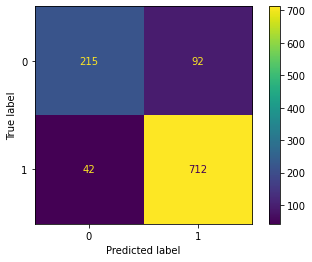

In [81]:
print(metrics.classification_report(y_train,gs.predict(X_train)))
print("----------------Train Data--------------")
plot_confusion_matrix(gs,X_train,y_train);

              precision    recall  f1-score   support

           0       0.79      0.65      0.72       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.78      0.80       456
weighted avg       0.82      0.83      0.82       456

----------------Test Data--------------


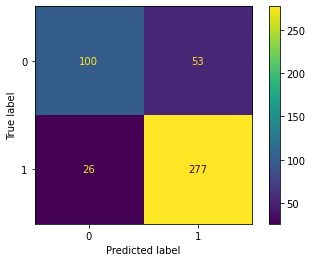

In [82]:
print(metrics.classification_report(y_test,gs.predict(X_test)))
print("----------------Test Data--------------")
plot_confusion_matrix(gs,X_test,y_test);

### Bagging

In [83]:
X = data_ba.drop('IsLabour_or_not', axis=1)
# Copy target into the y dataframe.
y = data_ba[['IsLabour_or_not']]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [85]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=50,random_state=0)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=50,
                  random_state=0)

#### Train Data

Accuracy 0.9707822808671065
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       307
           1       0.97      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.96      0.96      1061
weighted avg       0.97      0.97      0.97      1061

----------------Train Data--------------


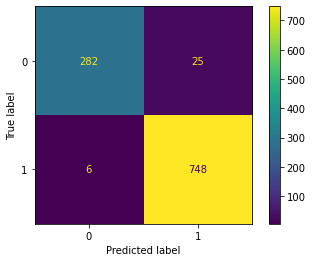

In [86]:
Y_train_predict=Bagging_model.predict(X_train)
model_score=Bagging_model.score(X_train, y_train)
print("Accuracy",model_score)
print(metrics.classification_report(y_train,Y_train_predict))
print("----------------Train Data--------------")
plot_confusion_matrix(Bagging_model,X_train,y_train);

The AUC of Train Data 0.997 


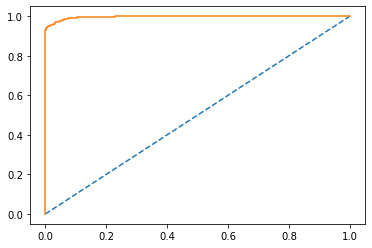

In [87]:
probs_train=Bagging_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("The AUC of Train Data %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

#### Test Data

Accuracy 0.8333333333333334
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456

----------------Test Data--------------


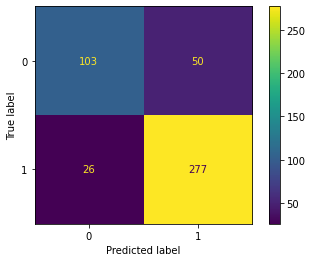

In [88]:
Y_test_predict=Bagging_model.predict(X_test)
model_score=Bagging_model.score(X_test, y_test)

print("Accuracy",model_score)
print(metrics.classification_report(y_test,Y_test_predict))
print("----------------Test Data--------------")
plot_confusion_matrix(Bagging_model,X_test,y_test);

The AUC of Test Data is 0.897 


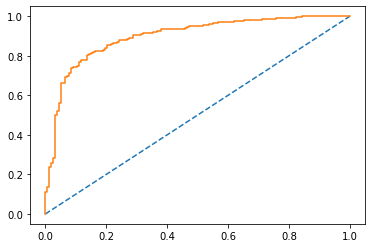

In [89]:
probs_test=Bagging_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("The AUC of Test Data is %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr);

### AdaBoost

In [90]:
X = data_bo.drop('IsLabour_or_not', axis=1)
# Copy target into the y dataframe.
y = data_bo[['IsLabour_or_not']]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [92]:
from sklearn.ensemble import AdaBoostClassifier

In [93]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

#### Train Data

Accuracy 0.8501413760603205
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061

----------------Train Data--------------


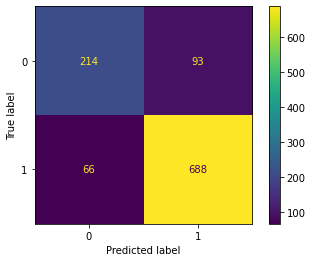

In [94]:
Y_train_predict=ADB_model.predict(X_train)
model_score=ADB_model.score(X_train, y_train)

print("Accuracy",model_score)
print(metrics.classification_report(y_train,Y_train_predict))
print("----------------Train Data--------------")
plot_confusion_matrix(ADB_model,X_train,y_train);

The AUC of Train Data 0.915 


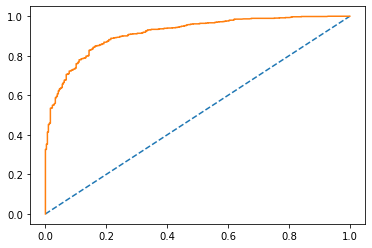

In [95]:
probs_train=ADB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("The AUC of Train Data %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

#### Test Data

Accuracy 0.8135964912280702
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456

----------------Test Data--------------


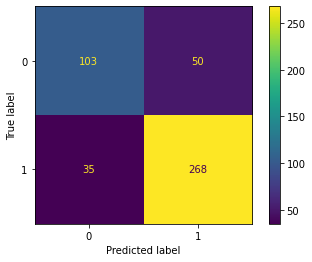

In [96]:
Y_test_predict=ADB_model.predict(X_test)
model_score=ADB_model.score(X_test, y_test)

print("Accuracy",model_score)
print(metrics.classification_report(y_test,Y_test_predict))
print("----------------Test Data--------------")
plot_confusion_matrix(ADB_model,X_test,y_test);

The AUC of Test Data is 0.877 


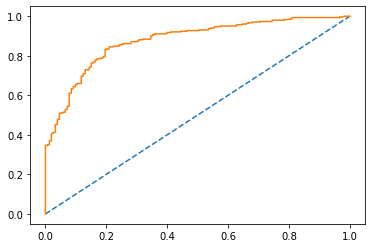

In [97]:
probs_test=ADB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("The AUC of Test Data is %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr);

### Gradient Boosting

In [98]:
X = data_gbo.drop('IsLabour_or_not', axis=1)

# Copy target into the y dataframe.
y = data_gbo[['IsLabour_or_not']]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

#### Train Data

Accuracy 0.8925541941564562
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061

----------------Train Data--------------


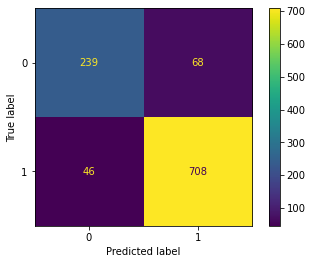

In [101]:
Y_train_predict=gbc_model.predict(X_train)
model_score=gbc_model.score(X_train, y_train)
print("Accuracy",model_score)
print(metrics.classification_report(y_train,Y_train_predict))
print("----------------Train Data--------------")
plot_confusion_matrix(gbc_model,X_train,y_train);

The AUC of Train Data 0.951 


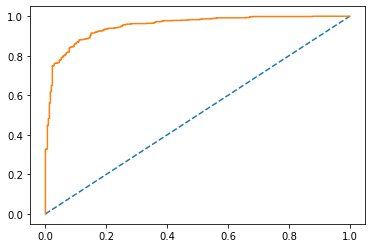

In [102]:
probs_train=gbc_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("The AUC of Train Data %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

#### Test Data

Accuracy 0.8355263157894737
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456

----------------Test Data--------------


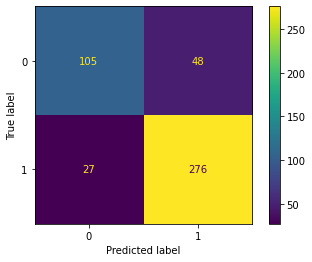

In [103]:
Y_test_predict=gbc_model.predict(X_test)
model_score=gbc_model.score(X_test, y_test)
print("Accuracy",model_score)
print(metrics.classification_report(y_test,Y_test_predict))
print("----------------Test Data--------------")
plot_confusion_matrix(gbc_model,X_test,y_test);

The AUC of Test Data is 0.899 


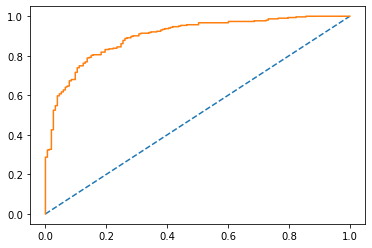

In [104]:
probs_test=gbc_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("The AUC of Test Data is %.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr);

### Problem 2:
### In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:
### 1.	President Franklin D. Roosevelt in 1941
### 2.	President John F. Kennedy in 1961
### 3.	President Richard Nixon in 1973


In [105]:
!pip install wordcloud

In [106]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [107]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [108]:
## Importing the necessary libraries along with the standard import
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import string # this is used for string manipulations

nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [109]:
from nltk.tokenize import sent_tokenize
text=inaugural.raw('1941-Roosevelt.txt')
tokenized_text=sent_tokenize(text)
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
len(tokenized_word)

1526

In [110]:
from nltk.tokenize import sent_tokenize
text1=inaugural.raw('1961-Kennedy.txt')
tokenized_text=sent_tokenize(text1)
from nltk.tokenize import word_tokenize
tokenized_word1=word_tokenize(text1)
len(tokenized_word1)

1543

In [111]:
from nltk.tokenize import sent_tokenize
text2=inaugural.raw('1973-Nixon.txt')
tokenized_text2=sent_tokenize(text2)
from nltk.tokenize import word_tokenize
tokenized_word2=word_tokenize(text2)
len(tokenized_word2)

2006

In [112]:
index = ['1941-Roosevelt','1961-Kennedy','1973-Nixon']
inaugural_speech=pd.DataFrame({'President':['Roosevelt - 1941','Kennedy - 1961','Nixon - 1973'],
                               'Text':[inaugural.raw('1941-Roosevelt.txt'),
                                       inaugural.raw('1961-Kennedy.txt'),
                                       inaugural.raw('1973-Nixon.txt')]},index=index)

In [113]:
inaugural_speech

,President,Text
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


<b>2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)</b>

In [114]:
#number of words
inaugural_speech['CharacterCount'] = inaugural_speech['Text'].str.len() ## this also includes spaces
inaugural_speech

,President,Text,CharacterCount
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,7571
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


In [115]:
#number of words
inaugural_speech['WordCount'] = inaugural_speech['Text'].apply(lambda x: len(str(x).split(" ")))
inaugural_speech

,President,Text,CharacterCount,WordCount
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,7571,1323
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1364
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1769


In [116]:
#number of sentences
from nltk.tokenize import sent_tokenize
inaugural_speech['TotalSentence'] = inaugural_speech['Text'].apply(lambda x: len(sent_tokenize(x)))
inaugural_speech

,President,Text,CharacterCount,WordCount,TotalSentence
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,7571,1323,68
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1364,52
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1769,68


In [117]:
# number of sentences in Roosevelt
y =pd.DataFrame({'Text':inaugural.raw('1941-Roosevelt.txt')},index =[0])
y['sentences'] = y['Text']
y

,Text,sentences
0,On each national day of inauguration since 178...,On each national day of inauguration since 178...


<b>2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.</b>

In [118]:
#Lower case conversion
inaugural_speech['Text'] = inaugural_speech['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
inaugural_speech['Text'].head()

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: Text, dtype: object

In [119]:
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
inaugural_speech['Text'] = inaugural_speech['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
inaugural_speech

,President,Text,CharacterCount,WordCount,TotalSentence
1941-Roosevelt,Roosevelt - 1941,"national day inauguration since 1789, people r...",7571,1323,68
1961-Kennedy,Kennedy - 1961,"vice president johnson, mr. speaker, mr. chief...",7618,1364,52
1973-Nixon,Nixon - 1973,"mr. vice president, mr. speaker, mr. chief jus...",9991,1769,68


In [120]:
inaugural_speech['CharacterCount'] = inaugural_speech['Text'].str.len()
inaugural_speech[['Text','CharacterCount']].head()

,Text,CharacterCount
1941-Roosevelt,"national day inauguration since 1789, people r...",4905
1961-Kennedy,"vice president johnson, mr. speaker, mr. chief...",5057
1973-Nixon,"mr. vice president, mr. speaker, mr. chief jus...",6266


In [121]:
list(inaugural_speech[inaugural_speech['President']=="Roosevelt - 1941"].Text)

['national day inauguration since 1789, people renewed sense dedication united states. washington\'s day task people create weld together nation. lincoln\'s day task people preserve nation disruption within. day task people save nation institutions disruption without. us come time, midst swift happenings, pause moment take stock -- recall place history been, rediscover may be. not, risk real peril inaction. lives nations determined count years, lifetime human spirit. life man three-score years ten: little more, little less. life nation fullness measure live. men doubt this. men believe democracy, form government frame life, limited measured kind mystical artificial fate that, unexplained reason, tyranny slavery become surging wave future -- freedom ebbing tide. americans know true. eight years ago, life republic seemed frozen fatalistic terror, proved true. midst shock -- acted. acted quickly, boldly, decisively. later years living years -- fruitful years people democracy. brought us g

In [122]:
list(inaugural_speech[inaugural_speech['President']=="Kennedy - 1961"].Text)

['vice president johnson, mr. speaker, mr. chief justice, president eisenhower, vice president nixon, president truman, reverend clergy, fellow citizens, observe today victory party, celebration freedom -- symbolizing end, well beginning -- signifying renewal, well change. sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago. world different now. man holds mortal hands power abolish forms human poverty forms human life. yet revolutionary beliefs forebears fought still issue around globe -- belief rights man come generosity state, hand god. dare forget today heirs first revolution. let word go forth time place, friend foe alike, torch passed new generation americans -- born century, tempered war, disciplined hard bitter peace, proud ancient heritage -- unwilling witness permit slow undoing human rights nation always committed, committed today home around world. let every nation know, whether wishes us well ill, shall pay price, bear burden, meet hardsh

In [123]:
list(inaugural_speech[inaugural_speech['President']=="Nixon - 1973"].Text)

['mr. vice president, mr. speaker, mr. chief justice, senator cook, mrs. eisenhower, fellow citizens great good country share together: met four years ago, america bleak spirit, depressed prospect seemingly endless war abroad destructive conflict home. meet today, stand threshold new era peace world. central question us is: shall use peace? let us resolve era enter postwar periods often been: time retreat isolation leads stagnation home invites new danger abroad. let us resolve become: time great responsibilities greatly borne, renew spirit promise america enter third century nation. past year saw far-reaching results new policies peace. continuing revitalize traditional friendships, missions peking moscow, able establish base new durable pattern relationships among nations world. america\'s bold initiatives, 1972 long remembered year greatest progress since end world war ii toward lasting peace world. peace seek world flimsy peace merely interlude wars, peace endure generations come. 

#### 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [124]:
print("Top three words in the 1941-Roosevelt speech")
freq = pd.Series(' '.join(inaugural_speech.iloc[0:1,1]).split()).value_counts()
freq

Top three words in the 1941-Roosevelt speech


--            22
know           9
us             8
life           6
freedom        5
              ..
common         1
joined         1
women          1
individual     1
god.           1
Length: 488, dtype: int64

In [125]:
print("Top three words in the 1961-Kennedy speech")
freq = pd.Series(' '.join(inaugural_speech.iloc[1:2,1]).split()).value_counts()
freq

Top three words in the 1961-Kennedy speech


--             24
let            16
us             11
new             7
sides           7
               ..
whatever        1
themselves,     1
efforts         1
misery,         1
own.            1
Length: 522, dtype: int64

In [126]:
print("Top three words in the  1973-Nixon speech")
freq = pd.Series(' '.join(inaugural_speech.iloc[2:3,1]).split()).value_counts()
freq

Top three words in the  1973-Nixon speech


us               25
let              22
--               17
new              15
peace            11
                 ..
despite           1
understanding     1
bridges           1
place             1
purpose.          1
Length: 496, dtype: int64

#### 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

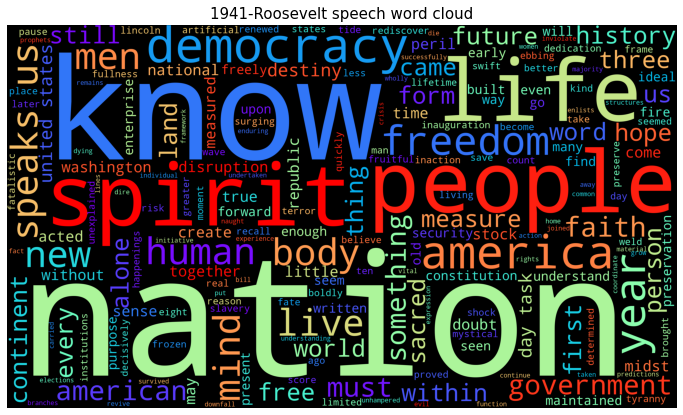

In [127]:
from wordcloud import WordCloud,STOPWORDS
#new_df=inaugural_speech.iloc[0:1,0]
words = ' '.join(inaugural_speech.iloc[0:1,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'rainbow',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.title("1941-Roosevelt speech word cloud",fontsize=15)
plt.axis('off')
plt.show()

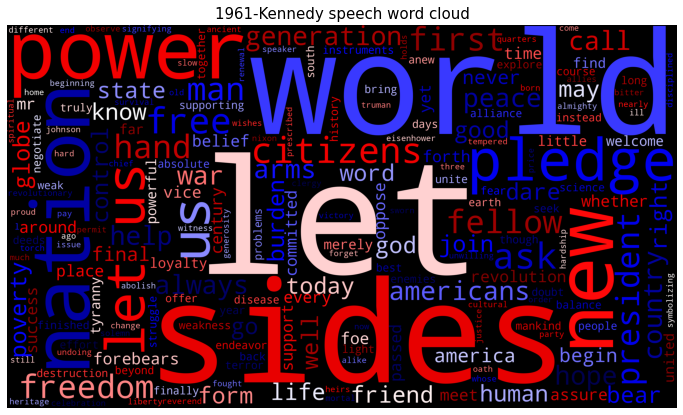

In [128]:
words = ' '.join(inaugural_speech.iloc[1:2,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'seismic_r',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.title("1961-Kennedy speech word cloud",fontsize=15)
plt.axis('off')
plt.show()

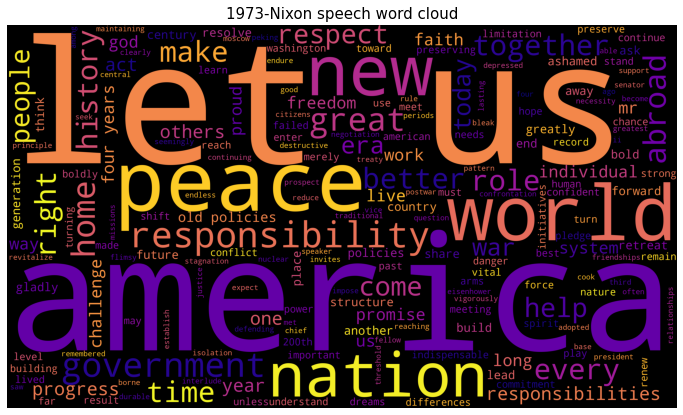

In [129]:
words = ' '.join(inaugural_speech.iloc[2:3,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'plasma',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.title("1973-Nixon speech word cloud",fontsize=15)
plt.axis('off')
plt.show()